In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'axes.labelsize': 'large'
})

 # Fotoefekt


Fotoekeft je pojav, pri katerem svetloba z dovolj visoko energijo — to pomeni dovolj visoko frekvenco — iz kovinske površine izbije elektron. Energija izbitega elektrona je energija fotona $W_f$ minus izstopno delo $A_i$

$$W_k = W_f - A_i = h\nu - A_i.$$

Pri tem je $h$ Planckova konstanta, $\nu$ frekvenca svetlobe in $A_i$ izstopno delo, t. j. delo ki ga elektron opravi pri izstopanju iz kovine. To delo je velikostnega reda nekaj eV.

Če fotone izbijamo iz pozitivno nabite plošče kondenzatorja, elektron zaustavlja električna sila. Če je kinetične energije $W_k$ dovolj, da elektron doseže negativno nabito ploščo kondenzatorja, imamo skozi kondenzator nek neničelen tok $I$. Če višamo napetost na kondenzatorju, se električno polje krepi. V točki, kjer elektroni nimajo dovolj kinetične energije, da bi dosegli negativno nabito ploščo, toka $I$ ni več. Napetosti $U$ v tej točki rečemo zastopna napetost, po ohranitvi energije pa velja

$$e_0 U = h\nu - A_i.$$

## Namen

Preveriti linearno zvezo med frekvenco svetlobe fotona $\nu$ in energijo fotona. Določiti Planckovo konstatno in izstopno delo.

## Pribor

Optična klop s fotocelico (osvetljenih kondenzatorjem), živosrebrna luč s transformatorjem, ampermeter, izvor napetosti, zaslonka, filtri različnih valovnih dolžin.

## Meritve

Prižgemo izvor napetosti in pustimo, da se ogreje. Nato na odprtino k fotocelici namestimo zaslonko s premerom 8 mm.

In [2]:
Φ = 1e-3 * 8

Živosrebrno svetilko prekrijemo s filtri, ki prepuščajo le svetlobo določene valovne dolžine. Nato višamo napetost, dokler tok na ampermetru ne pade na 0.

In [86]:
λ = 1e-9 * np.array(
    [365, 405, 436, 546, 577]
)
I = [
    1e-13 * np.array([398, 350, 300, 250, 200, 150, 100, 50, 0]),
    1e-13 * np.array([316, 300, 270, 240, 210, 180, 150, 120, 90, 60, 30, 0]),
    1e-13 * np.array([390, 350, 300, 250, 200, 150, 100, 50, 0]),
    1e-13 * np.array([206, 180, 160, 140, 120, 100, 80, 60, 40, 20, 0]),
    1e-13 * np.array([88, 70, 60, 50, 40, 30, 20, 10, 0])
]
U = [
    np.array([0, 0.111, 0.280, 0.459, 0.648, 0.855, 1.079, 1.332, 1.743]),
    np.array([0, 0.039, 0.136, 0.237, 0.347, 0.455, 0.568, 0.691, 0.818, 0.961, 1.128, 1.393]),
    np.array([0, 0.092, 0.217, 0.346, 0.484, 0.628, 0.784, 0.968, 1.246]),
    np.array([0, 0.067, 0.124, 0.179, 0.235, 0.293, 0.352, 0.415, 0.482, 0.564, 0.685]),
    np.array([0, 0.084, 0.136, 0.187, 0.242, 0.295, 0.358, 0.425, 0.531])
]

## Račun

Energija $e_0 U$ pri zastojni napetosti je linearno odvisna od frekvence $\nu$

$$W_k = h\nu - A_i.$$

Skozi meritve lahko torej potegnemo premico.

In [33]:
e_0 = 1e-19 * 1.602
c = 299792458

U_stop = np.array(list(map(lambda row: row[-1], U)))
ν = c / λ
par, cov = np.polyfit(ν, e_0 * U_stop, 1, cov=True)
h, σ_h = par[0], np.sqrt(cov[0,0])
A_i, σ_A_i = -par[1], np.sqrt(cov[1,1])
h, σ_h

(6.31212953801568e-34, 1.8307924970169607e-35)

Naklon premice je Planckova konstanta z vrednostjo

$$h = (6.3 \pm 0.2) \cdot 10^{-34}\mathrm{Js}.$$

In [34]:
A_i / e_0, σ_A_i / e_0

(1.494942599365038, 0.07694772982962567)

Presečišče premice z ordinato je negativna vrednost izstopnega dela. Izstopno delo je torej

$$A_i = (1.50 \pm 0.08)\,\mathrm{eV}.$$

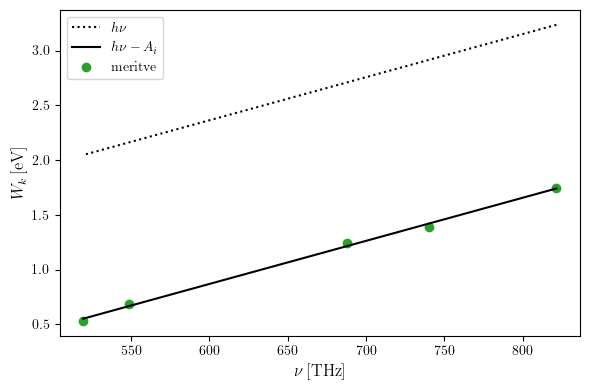

In [53]:
fig, ax = plt.subplots(1, 1, figsize=[6, 4])

ax.scatter(1e-12 * ν, U_stop, label='meritve', color='tab:green')
ax.plot(1e-12 * ν, h*ν / e_0, label=r'$h\nu$', color='black', linestyle=':')
ax.plot(1e-12 * ν, (h*ν - A_i) / e_0, label=r'$h\nu - A_i$', color='black')

ax.set_xlabel(r'$\nu\,[\mathrm{THz}]$')
ax.set_ylabel(r'$W_k\,[\mathrm{eV}]$')
ax.legend()
fig.tight_layout()

Zdaj pogledamo še odvistnost toka $I$ od napetosti na fotocelici. Če bi vsi izbiti elektroni izvirali iz površine kovine, bi ta odvisnost bila konstantna vse do zaporne napetosti — elektron se namreč prebije do negativno nabite plošče ali ne. A jasno vidimo, da to ni res. Lahko sklepamo, da vsi elektroni ne prihajajo iz površine, temveč iz volumna kovine. Če elektron izvira globlje v kovini, to pomeni večje izstopno delo.

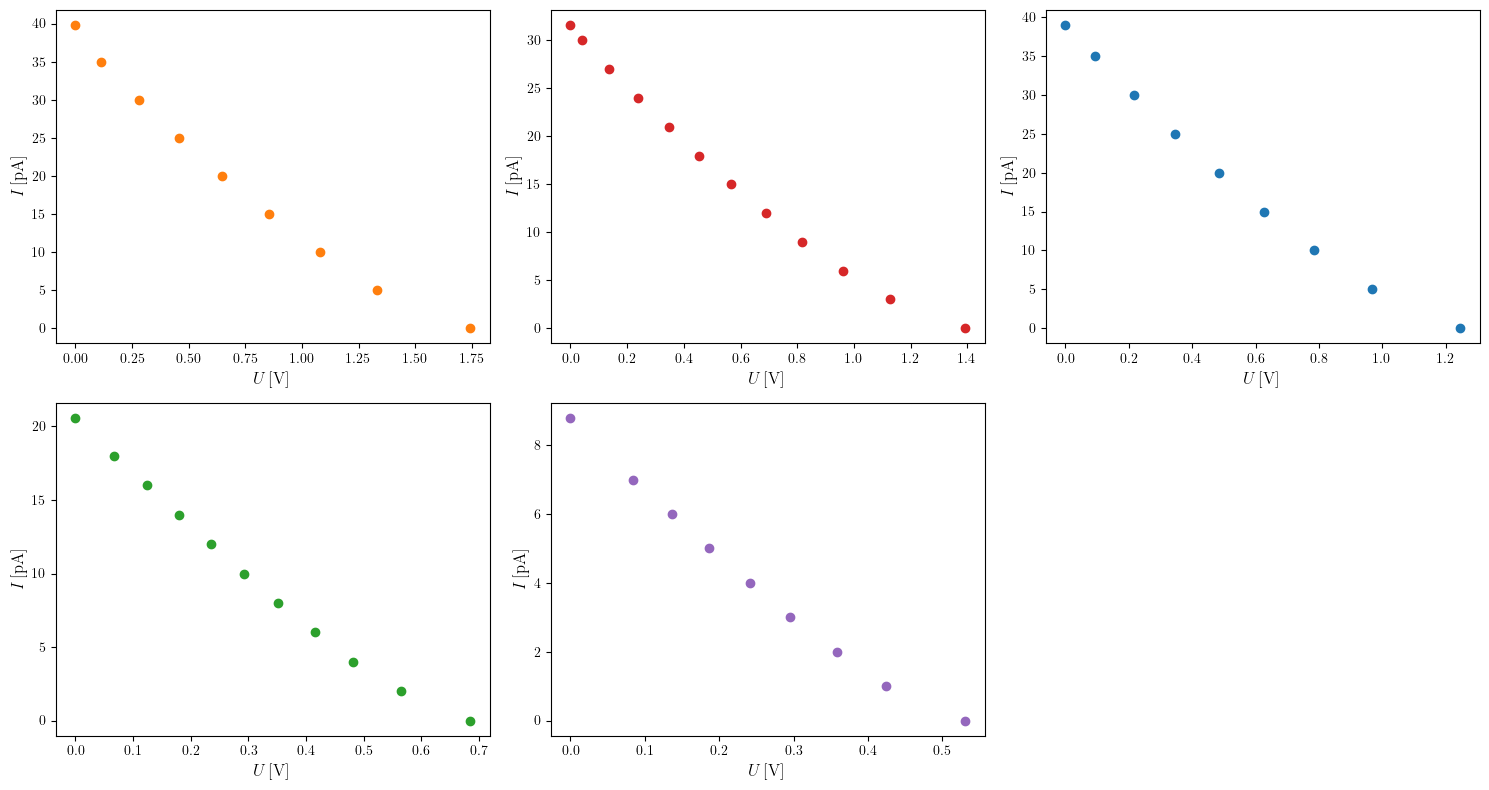

In [95]:
fig, axs = plt.subplots(2, 3, figsize=[15, 8])

axs[0,0].scatter(U[0], 1e12 * I[0], label='meritve', color='tab:orange')
axs[0,1].scatter(U[1], 1e12 * I[1], label='meritve', color='tab:red')
axs[0,2].scatter(U[2], 1e12 * I[2], label='meritve', color='tab:blue')
axs[1,0].scatter(U[3], 1e12 * I[3], label='meritve', color='tab:green')
axs[1,1].scatter(U[4], 1e12 * I[4], label='meritve', color='tab:purple')
axs[1,2].remove()

axs[0,0].set_xlabel(r'$U\,[\mathrm{V}]$')
axs[0,0].set_ylabel(r'$I\,[\mathrm{pA}]$')
axs[0,1].set_xlabel(r'$U\,[\mathrm{V}]$')
axs[0,1].set_ylabel(r'$I\,[\mathrm{pA}]$')
axs[0,2].set_xlabel(r'$U\,[\mathrm{V}]$')
axs[0,2].set_ylabel(r'$I\,[\mathrm{pA}]$')
axs[1,0].set_xlabel(r'$U\,[\mathrm{V}]$')
axs[1,0].set_ylabel(r'$I\,[\mathrm{pA}]$')
axs[1,1].set_xlabel(r'$U\,[\mathrm{V}]$')
axs[1,1].set_ylabel(r'$I\,[\mathrm{pA}]$')
fig.tight_layout()